In [12]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression().fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))




Training set score: 0.953
Test set score: 0.958


In [13]:
# Compute confusion matrix
## your code here
logreg100 = LogisticRegression(C=100)
logreg100.fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.981
Test set score: 0.965


In [14]:
logreg0001 = LogisticRegression(C=0.001)
logreg0001.fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg0001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg0001.score(X_test, y_test)))

Training set score: 0.923
Test set score: 0.937


In [15]:
#b
y_predict = logreg.predict(X_test)
print(1)
print(confusion_matrix(y_test, y_predict))
y_predict = logreg100.predict(X_test)
print(100)
print(confusion_matrix(y_test, y_predict))
y_predict = logreg0001.predict(X_test)
print(0.001)
print(confusion_matrix(y_test, y_predict))

1
[[48  5]
 [ 1 89]]
100
[[49  4]
 [ 1 89]]
0.001
[[46  7]
 [ 2 88]]


In [19]:
#c
import numpy as np
arr = np.array(logreg100.coef_)
idxList = np.argsort(arr)
print(idxList)
idx_3 = [idxList[0,0],idxList[0,1],idxList[0,2]]
for idx in idx_3:
    print (idx)
    print(cancer.feature_names[idx],":", arr[0,idx])

[[27 24 28  7  8 26  4  6 14 21 12 17  2 13 23  3 22  1  9 29 20 10 25  5
  19 18 11  0 15 16]]
27
worst concave points : -12.7130811207
24
worst smoothness : -7.68817580607
28
worst symmetry : -6.78299700541


In [17]:
#d
logreg_l1 = LogisticRegression(C=1, penalty='l1')
logreg_l1.fit(X_train, y_train)
y_predict = logreg_l1.predict(X_test)
print(1)
print("Training set score: {:.3f}".format(logreg_l1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg_l1.score(X_test, y_test)))
print(confusion_matrix(y_test, y_predict))

logreg100_l1 = LogisticRegression(C=100, penalty='l1')
logreg100_l1.fit(X_train, y_train)
y_predict = logreg100_l1.predict(X_test)
print(100)
print("Training set score: {:.3f}".format(logreg100_l1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100_l1.score(X_test, y_test)))
print(confusion_matrix(y_test, y_predict))

logreg0001_l1 = LogisticRegression(C=0.001, penalty='l1')
logreg0001_l1.fit(X_train, y_train)
y_predict = logreg0001_l1.predict(X_test)
print(1)
print("Training set score: {:.3f}".format(logreg0001_l1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg0001_l1.score(X_test, y_test)))
print(confusion_matrix(y_test, y_predict))

1
Training set score: 0.960
Test set score: 0.958
[[48  5]
 [ 1 89]]
100
Training set score: 0.986
Test set score: 0.979
[[50  3]
 [ 0 90]]
1
Training set score: 0.913
Test set score: 0.923
[[42 11]
 [ 0 90]]


L2 Penalty


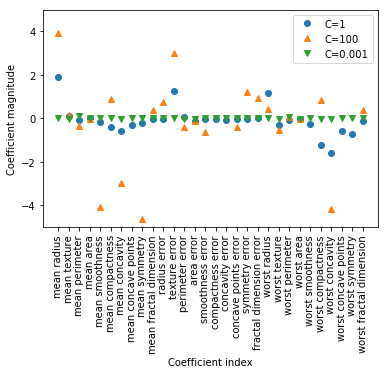

L1 Penalty


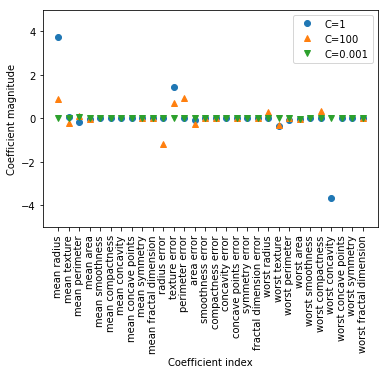

In [8]:
#e
print("L2 Penalty");
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T , '^', label="C=100")
plt.plot(logreg0001.coef_.T , 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.show()

print("L1 Penalty");
plt.plot(logreg_l1.coef_.T, 'o', label="C=1")
plt.plot(logreg100_l1.coef_.T , '^', label="C=100")
plt.plot(logreg0001_l1.coef_.T , 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.show()

In [10]:
y_train

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0,